In [133]:
#import required libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
import warnings as wr
wr.filterwarnings('ignore')

In [134]:
df = pd.read_csv('Height-Weight Data.csv') #read csv file using panda
df.head() #display first 5 rows from dataset 

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


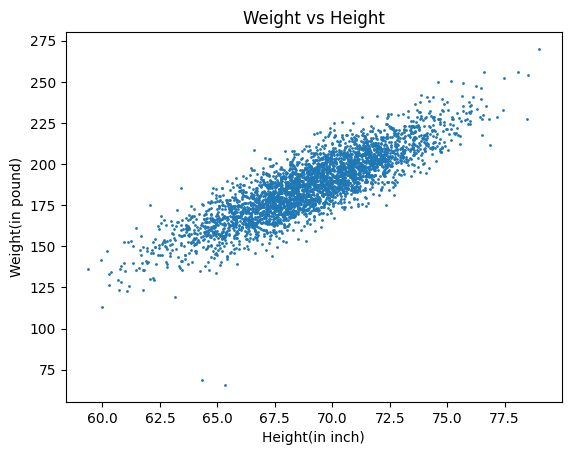

In [135]:
#plotting the data in scatter plot
plt.scatter(df[['Height']] , df[['Weight']],s = 1) 
plt.xlabel('Height(in inch)')
plt.ylabel('Weight(in pound)')
plt.title('Weight vs Height')
plt.show()

In [136]:
x = df.drop('Weight', axis=1) #get all data from height column
y = df.drop('Height', axis=1) #get all data from weight column
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.3, random_state=1) #spliting data (70% for train and 30% for test) 

## Linear Regression

In [137]:
reg = LinearRegression() #creating a linear regression model
reg.fit(xtrain, ytrain) #training model
m = reg.coef_[0][0] #coefficient
c = reg.intercept_[0] #interceptor
print(f"m : {m}\nc : {c}")

m : 5.977449461679658
c : -225.82603000755844


In [138]:
df2 = df.copy() #get a copy of data frame
df2["Predicted Weight"] = reg.predict(x) #create a new column for predicted wight
df2.head()

,Height,Weight,Predicted Weight
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873


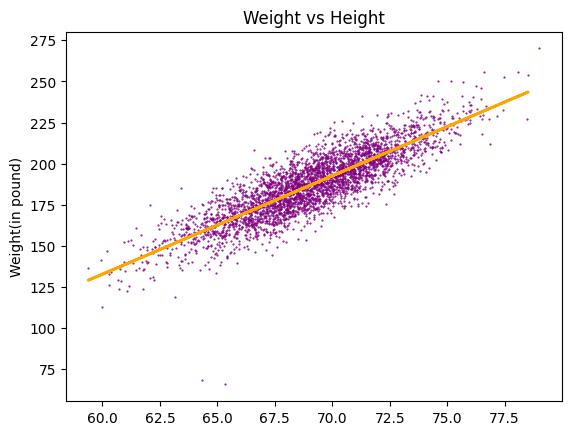

In [148]:
#plotting both the scatter plot and trained model prediction
plt.scatter(df[['Height']] , df[['Weight']], color='purple', marker='.',s=1)
plt.plot(xtest, reg.predict(xtest), color='orange',linewidth = 2) 
plt.ylabel('Weight(in pound)')
plt.title('Weight vs Height')
plt.show()

## Error

In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [149]:
test_mse = mean_squared_error(ytest, reg.predict(xtest)) #MSE for test data
test_mae = mean_absolute_error(ytest, reg.predict(xtest)) #MAE for test data
train_mse = mean_squared_error(ytrain, reg.predict(xtrain)) #MSE for train data
train_mae = mean_absolute_error(ytrain, reg.predict(xtrain)) #MAE for train data
print("Test MSE: ",test_mse,"\nTest MAE: ",test_mae)
print("Train MSE: ",train_mse,"\nTrain MAE: ",train_mae)

Test MSE:  110.89221516932378 
Test MAE:  8.279688660993672
Train MSE:  103.91701705613012 
Train MAE:  7.9807949267803115
